# Amazon.com için yazılan yorumları nlp ile işleyerek, yeni gelen yorumların analizi ve model oluşturulması

## 1. Giriş
Bu proje sadece Colabda yapilabilir. Cunku veri dosyasi cok buyuk. Hem internetinizi hem bilgisayarinizi zorlar.
The data contains the customer reviews for all listed *Electronics* products spanning from May 1996 up to July 2014. There are a total of 1,689,188 reviews by a total of 192,403 customers on 63,001 unique products.
Please download this Jupyter notebook file and redo everything by yourself and explain what is going on with your own words.

Bu jupyter notebook dosyasını indirip Amazon.com satılan elektronik ürünleri için yazılan 1 milyon 689 bin 188 yorum hakkında:
1. öğrendiğimiz bütün NLP metodları uygulayıp,
2. Küçük harfe çevirip,
3. noktalama işaretlerini ve HTML taglerini kaldırıp,
4. 'stopwords'leri kaldırıp,
5. İyi ve kötü yorumlar hakkında wordcloud (Kelime bulutu) oluşturup,
6. Overall Sütunundaki rating'e göre classification algoritmalarını çalıştırarak, yeni gelecek yorumların rating'ini tahmin eden bir model geliştirp,
7. NER(Named Entity Recognition) gibi konuları araştırarak,
8. her bölümden ne anladığınızı kendi yorumlarınızla yazıp, aynı kodları daha kısa yazarak geriye yükleyiniz.

Milyonlarca satır veri oldugu için df=df.sample(400000) ile sadece 400  bin satır veri ile çalışacaksınız.

In [1]:
import warnings # Uyarıları içer aktarır

warnings.simplefilter("ignore", UserWarning) # Türüne göre uyarıları kapatma kodları
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

import pandas as pd
import numpy as np
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 2. Veri Yükleme ve Örnekleme

In [2]:
import os  # 'os' modülü dosya ve dizin işlemleri yapmak için kullanılır.
import pandas as pd  # 'pandas' modülü, veri işleme ve analiz için kullanılır.

dataset = "Electronics_5.json"  # Kullanılacak veri dosyasının adı ve yolunu belirler.

# Dosyanın mevcut olup olmadığını kontrol eder
if os.path.isfile(dataset):
    # Eğer 'Electronics_5.json' dosyası mevcutsa, bu dosyayı satır satır okuyarak bir pandas DataFrame'e yükler.
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    # Eğer dosya yoksa, veriyi internetten gzip formatında bir bağlantıdan indirip okur.
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    # Gzip ile sıkıştırılmış veriyi okur ve pandas DataFrame'e yükler.
    df = pd.read_json(url, compression='gzip', lines=True)

# İlk 10 satırı ekrana getirir. DataFrame'in ilk 10 gözlemini görmek için kullanılır.
display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [3]:
df = df.sample(10000) # Kolay çalışmak için 10k veri aldık

In [4]:
df.reset_index(drop=True, inplace=True) # index resetledik

In [5]:
df.to_csv("amazon.csv", index=False) # csv dosyasına kaydettik

In [6]:
df["reviewText"] # Temizleyeceğimiz kısım

,reviewText
0,This is the best case best case that I found. ...
1,"This product is a breeze to set up, taking onl..."
2,"Didnt care for this product, at all, wouldnt r..."
3,My desk is cluttered. The last thing I need a...
4,Still using and in perfect working order.
...,...
9995,42 inch on it easy to install easy use. Make s...
9996,I bought this for a old dell PC 2400 and it fi...
9997,"Fits perfect for my macbook air 13"". works ex..."
9998,"Okay, you are on the fence about this mouse. I..."


In [7]:
df["reviewText"][44] # örnek satır

'I looked at a LOT of Wireless-N adapters, on Amazon and Newegg.  I considered USB and internal cards.  This was extremely easy to setup, cheap, and the speeds are much better than the older wireless B/G.'

## 3. Veri Ön İşleme
### 3.1 Küçük Harfe Çevirme

### 3.2 Noktalama İşaretlerini Kaldırma

### 3.3 HTML Taglerini Kaldırma

### 3.4 Stopwords Kaldırma

In [9]:
!pip install neattext
import neattext.functions as nfx # import the functions module from neattext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 934.0 kB/s eta 0:00:00


In [10]:
from neattext.functions import clean_text

def preprocess_text(text):
    clean = clean_text(text,
                       puncts=True, # Noktalama
                       stopwords=True, # Stopwords
                       urls=True,
                       emails=True,
                       numbers=True,
                       emojis=True,
                       special_char=True,
                       phone_num=True,
                       non_ascii=True,
                       multiple_whitespaces=True,
                       contractions=True,
                       currency_symbols=True,
                       custom_pattern=r'<.*?>') # html
    clean = nfx.normalize(text) # Lower case
    return clean

df['processed_text'] = df['reviewText'].apply(preprocess_text)

In [11]:
"""from neattext.functions import clean_text
import inspect

print(inspect.signature(clean_text))"""

'from neattext.functions import clean_text\nimport inspect\n\nprint(inspect.signature(clean_text))'

In [12]:
#df["reviewText"].tolist() # All

In [13]:
s = " ".join(df['processed_text'].tolist()) # ALL in One

In [14]:
print(f"Orijinal: {df['reviewText'][44]}\n\nİşlenmiş: {df['processed_text'][44]}")

Orijinal: This is the best case best case that I found. I like that the holder comes out so you can hold your Kindle Fire easier. Also has extra space for a small note pad, business cards and I put a microfiber cloth in it to keep the screen clean. The case is very durable and the zipper heavy duty. I would recommend this to anyone.

İşlenmiş: this is the best case best case that i found. i like that the holder comes out so you can hold your kindle fire easier. also has extra space for a small note pad, business cards and i put a microfiber cloth in it to keep the screen clean. the case is very durable and the zipper heavy duty. i would recommend this to anyone.


## 4. Kelime Bulutu (Wordcloud) Oluşturma
### 4.1 İyi ve Kötü Yorumlar İçin Kelime Bulutu

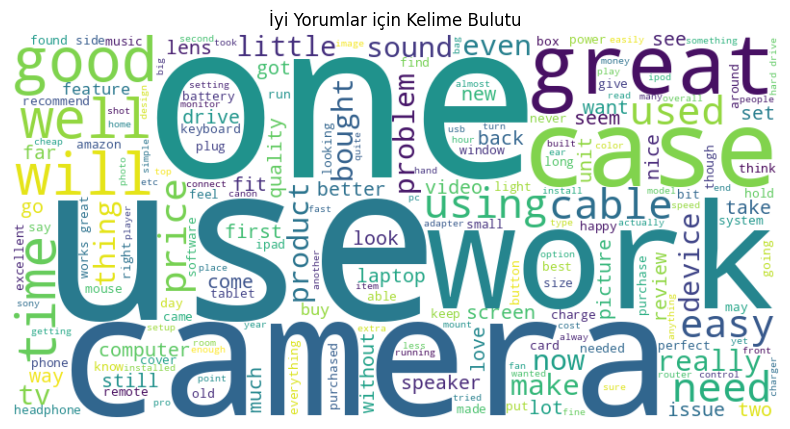

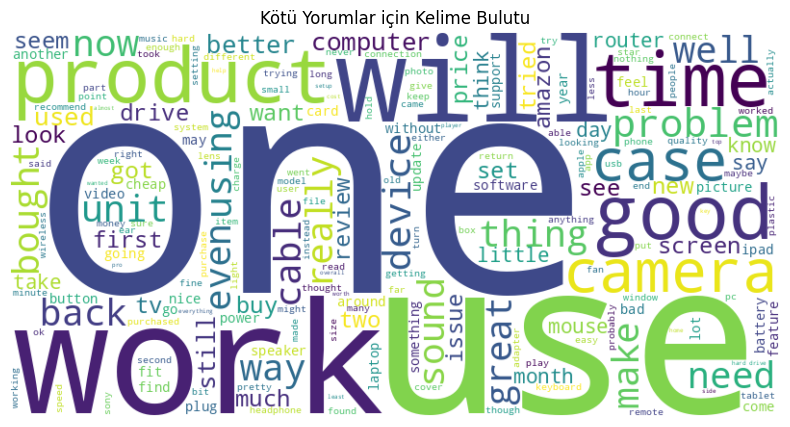

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

good_reviews = ' '.join(df[df['overall'] > 3]['processed_text'])
bad_reviews = ' '.join(df[df['overall'] <= 3]['processed_text'])

create_wordcloud(good_reviews, 'İyi Yorumlar için Kelime Bulutu')
create_wordcloud(bad_reviews, 'Kötü Yorumlar için Kelime Bulutu')

## 5. Sınıflandırma Modeli Geliştirme

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       406
           1       0.89      0.90      0.90      1594

    accuracy                           0.84      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.83      0.84      0.83      2000



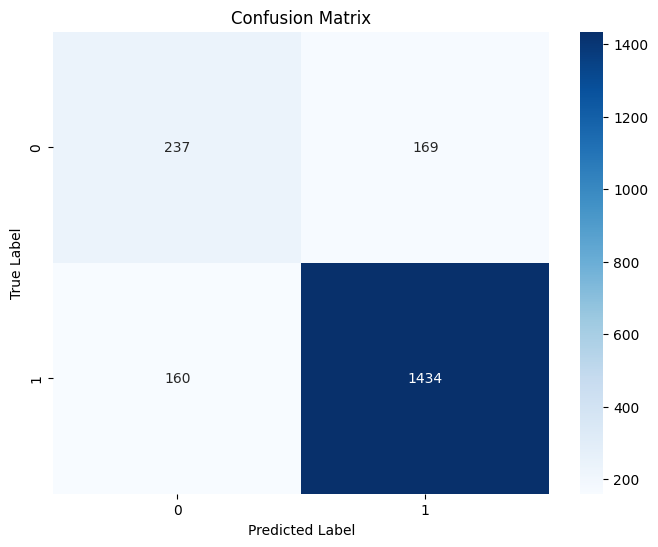

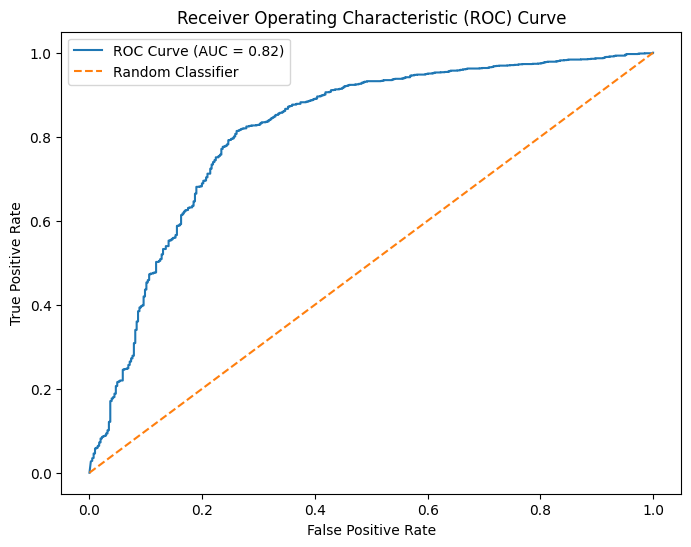

AUC Score: 0.8170
Cross-Validation Scores: [0.8375   0.83875  0.8425   0.845    0.840625]
Mean CV Score: 0.8409


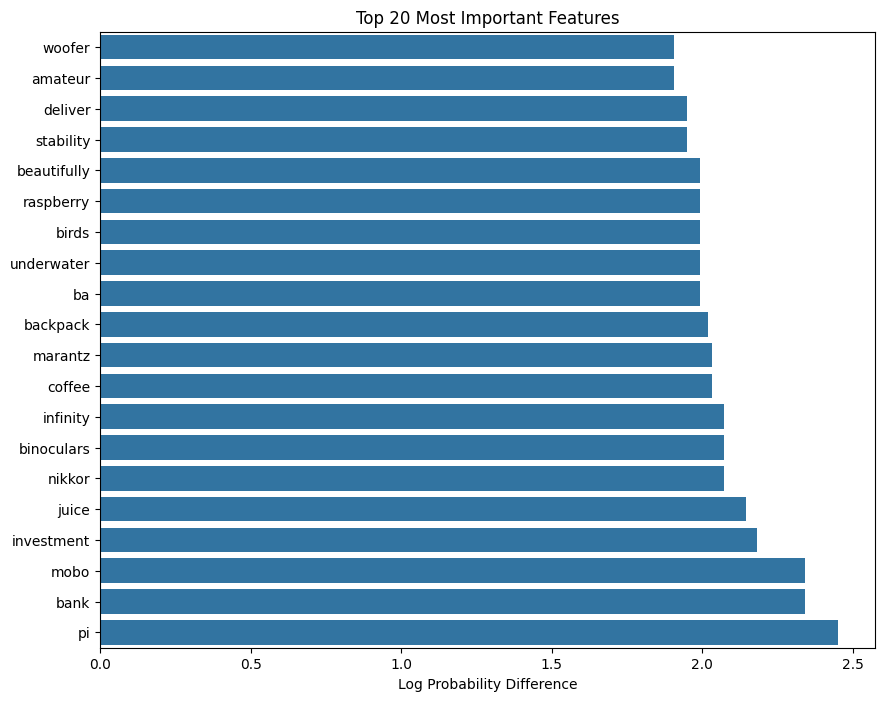

Positive
Positive


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri hazırlama ve model eğitimi (önceki kodunuzdan)
X = df['processed_text']
y = df['overall'].apply(lambda x: 1 if x > 3 else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Tahminler
y_pred = model.predict(X_test_vec)
y_pred_proba = model.predict_proba(X_test_vec)[:, 1]

# 1. Sınıflandırma Raporu
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. Karmaşıklık Matrisi (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 3. ROC Eğrisi ve AUC Skoru
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

print(f"AUC Score: {auc:.4f}")

# 4. Çapraz Doğrulama (Cross-Validation)
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")

# 5. En Önemli Özellikler
feature_importance = model.feature_log_prob_[1] - model.feature_log_prob_[0]
top_features = np.argsort(feature_importance)[-20:]  # En önemli 20 özellik
feature_names = np.array(vectorizer.get_feature_names_out())[top_features]

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance[top_features], y=feature_names)
plt.title('Top 20 Most Important Features')
plt.xlabel('Log Probability Difference')
plt.show()

# 6. Yeni Yorumların Rating'ini Tahmin Etme (önceki kodunuzdan)
def predict_rating(review):
    processed_review = preprocess_text(review)
    vec_review = vectorizer.transform([processed_review])
    prediction = model.predict(vec_review)
    return "Positive" if prediction[0] == 1 else "Negative"

# Örnek kullanım
print(predict_rating("This product is amazing!"))
print(predict_rating("I did not like this product at all."))

## 6.NER(Named Entity Recognition) Örneği

In [21]:
import spacy
import pandas as pd
from tqdm import tqdm

# spaCy'nin İngilizce modelini yükle
nlp = spacy.load("en_core_web_sm")

# NER (Named Entity Recognition) uygulayan fonksiyon
def perform_ner(text):
    doc = nlp(text)  # Metni spaCy ile işle
    return [(ent.text, ent.label_) for ent in doc.ents]  # Bulunan varlıkları ve etiketlerini döndür

# tqdm ile ilerleme çubuğu göstererek tüm metinlere NER uygula
tqdm.pandas()  # pandas için tqdm'yi etkinleştir
df['named_entities'] = df['processed_text'].progress_apply(perform_ner)  # Her metne NER uygula ve sonuçları yeni sütuna kaydet

# İşlenmiş metin ve bulunan varlıkları göster
print(df[['processed_text', 'named_entities']].head())

# Tüm varlık türlerini bir listede topla
entity_types = [entity[1] for entities in df['named_entities'] for entity in entities]
# Varlık türlerinin sayısını hesapla
entity_counts = pd.Series(entity_types).value_counts()

print("\nEn sık görülen varlık türleri:")
print(entity_counts)

# Tüm varlıkları bir listede topla
entities = [entity[0] for entities in df['named_entities'] for entity in entities]
# Varlıkların sayısını hesapla
entity_counts = pd.Series(entities).value_counts()

print("\nEn sık görülen varlıklar (ilk 20):")
print(entity_counts.head(20))  # İlk 20 en sık görülen varlığı göster

100%|██████████| 10000/10000 [06:02<00:00, 27.57it/s]

                                      processed_text  \
0  this is the best case best case that i found. ...   
1  this product is a breeze to set up, taking onl...   
2  didnt care for this product, at all, wouldnt r...   
3  my desk is cluttered.  the last thing i need a...   
4          still using and in perfect working order.   

                                      named_entities  
0                                                 []  
1                                    [(home.i, ORG)]  
2  [(daily, DATE), (one, CARDINAL), (weekly, DATE...  
3           [(every penny, MONEY), ($ price, MONEY)]  
4                                                 []  

En sık görülen varlık türleri:
CARDINAL       4311
DATE           3588
ORG            3297
ORDINAL        1756
PERSON         1525
TIME           1193
GPE             820
MONEY           482
NORP            315
QUANTITY        224
LOC             130
PRODUCT         112
PERCENT          32
LANGUAGE         25
EVENT            23
W